# Nonlinear Equations

We want to find a root of the nonlinear function $f$ using different methods.

1. Bisection method
2. Newton method
3. Chord method
4. Secant method
5. Fixed point iterations





In [1]:
%matplotlib inline
from numpy import *
from matplotlib.pyplot import *
import sympy as sym


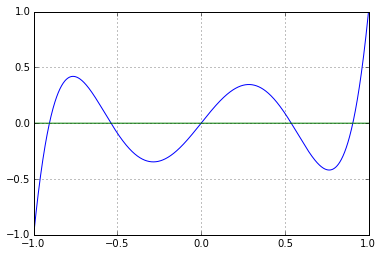

In [51]:
t = sym.symbols('t')

f_sym = t/8. * (63.*t**4 - 70.*t**2. +15.) # Legendre polynomial of order 5

f_prime_sym = sym.diff(f_sym,t)

f = sym.lambdify(t, f_sym, 'numpy')
f_prime = sym.lambdify(t,f_prime_sym, 'numpy')

phi = lambda x : 63./70.*x**3 + 15./(70.*x)
#phi = lambda x : 70.0/15.0*x**3 - 63.0/15.0*x**5
#phi = lambda x : sqrt((63.*x**4 + 15.0)/70.)

# Let's plot
n = 1025

x = linspace(-1,1,n)
c = zeros_like(x)

_ = plot(x,f(x))
_ = plot(x,c)
_ = grid()


In [52]:
# Initial data for the variuos algorithms

# interval in which we seek the solution 
a = -0.1
b = 0.7

# initial points
x0 = (a+b)/2.0
x00 = b


In [53]:
# stopping criteria
eps = 1e-10
n_max = 1000

## Bisection method

$$
x^k = \frac{a^k+b^k}{2}
$$
```
                   if (f(a_k) * f(x_k)) < 0:
                      b_k1 = x
                      a_k1 = a_k
                   else:
                      a_k1 = x
                      b_k1 = b_k
```

30
-4.65661287308e-11
8.73114913702e-11


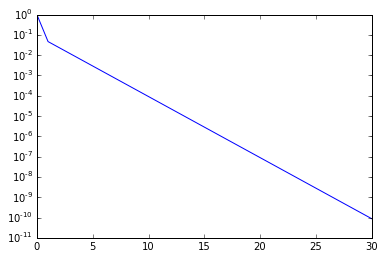

In [15]:
def bisect(f,a,b,eps,n_max):
    a_new = a
    b_new = b
    x = mean([a,b])
    err = eps + 1.
    errors = [err]
    it = 0
    while (err > eps and it < n_max):
        if ( f(a_new)*f(x) < 0):
            b_new = x
        else:
            a_new = x
            
        x_new = mean([a_new,b_new])
        
        err = abs(f(x_new))
        errors.append(err)
        x = x_new
        it +=1
    semilogy(errors)
    print it
    print x
    print err
    return errors
    
error_bisect = bisect(f,a,b,eps,n_max)

In [ ]:
# is the number of iterations coherent with the theoretical estimation?

In order to find out other methods for solving non-linear equations, let's compute the Taylor's series of $f(x^k)$ up to the first order 

$$
f(x^k) \simeq f(x^k) + (x-x^k)f^{\prime}(x^k)
$$
which suggests the following iterative scheme
$$
x^{k+1} = x^k - \frac{f(x^k)}{f^{\prime}(x^k)}
$$

The following methods are obtained applying the above scheme where

$$
f^{\prime}(x^k) \approx q^k
$$

## Newton's method
$$
q^k = f^{\prime}(x^k)
$$

$$
x^{k+1} = x^k - \frac{f(x^k)}{q^k}
$$

0.906179845939
2.70894418009e-14
12


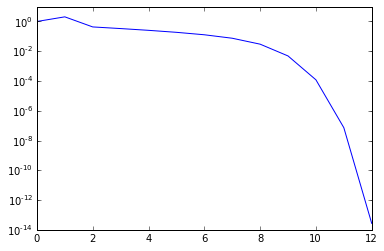

In [62]:
def newton(f,f_prime,x0,eps,n_max):
    err = eps + 1
    errors = [err]
    it = 0
    x = x0
    while ( err > eps and it < n_max):
        qk = f_prime(x)
        x_new = x - f(x)/qk
        err = abs(x_new -x)
        x = x_new
        errors.append(err)
        it += 1
    
    print x
    print err
    print it
    semilogy(errors)
    return errors

error_newton = newton(f,f_prime,x0,eps,n_max)
        

## Chord method

$$
q^k \equiv q = \frac{f(b)-f(a)}{b-a}
$$

$$
x^{k+1} = x^k - \frac{f(x^k)}{q}
$$

nan
nan
6


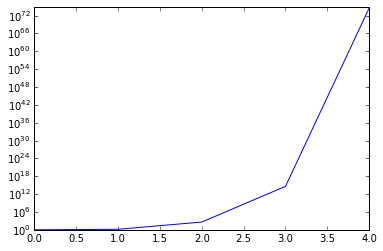

In [66]:
def chord(f,a,b,x0,eps,n_max):
    q = (f(b) - f(a))/(b - a)
    err = eps + 1
    errors = [err]
    it = 0
    x = x0
    while ( err > eps and it < n_max):
        x_new = x - f(x)/q
        err = abs(x_new -x)
        x = x_new
        errors.append(err)
        it += 1
    
    print x
    print err
    print it
    semilogy(errors)
    return errors

error_chord = chord(f,a,b,x0,eps,n_max)   

## Secant method

$$
q^k = \frac{f(x^k)-f(x^{k-1})}{x^k - x^{k-1}}
$$

$$
x^{k+1} = x^k - \frac{f(x^k)}{q^k}
$$

Note that this algorithm requirs **two** initial points

-7.96445941412e-20
9.04783798729e-11
4


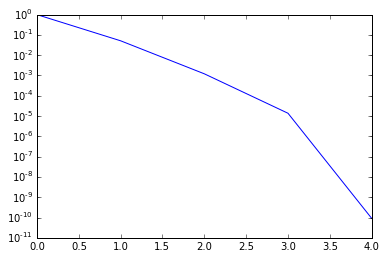

In [35]:
def secant(f,x0,x00,eps,n_max):
    err = eps + 1
    errors = [err]
    it = 0
    xk = x0
    xkk = x00
    while ( err > eps and it < n_max):
        qk = (f(xk) - f(xkk))/(xk - xkk)
        x_new = xk - f(xk)/qk
        err = abs(x_new -xk)
        xkk = xk
        xk = x_new
        errors.append(err)
        it += 1
    
    print xk
    print err
    print it
    semilogy(errors)
    return errors

error_secant = secant(f,x0,x00,eps,n_max)

## Fixed point iterations

$$
f(x)=0 \to x-\phi(x)=0
$$

$$
x^{k+1} = \phi(x^k)
$$

0.538469310108
6.03431749013e-11
11
-5.62059372352e-12


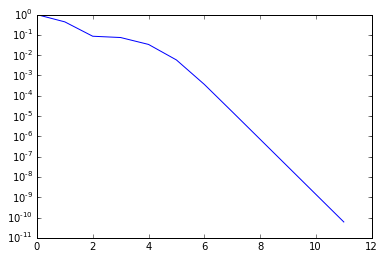

In [58]:
def fixed_point(phi,x0,eps,n_max):
    err = eps + 1
    errors = [err]
    it = 0
    x_old = x0
    while ( err > eps and it < n_max):
        x_new = phi(x_old)
        err = abs(x_new -x_old)
        errors.append(err)
        x_old = x_new
        it += 1
        
    print x_new
    print err
    print it
    semilogy(errors)
    return errors
    
error_fixedpoint = fixed_point(phi,x0,eps,n_max)
print f(0.538469310108)

NameError: name 'error_chord' is not defined

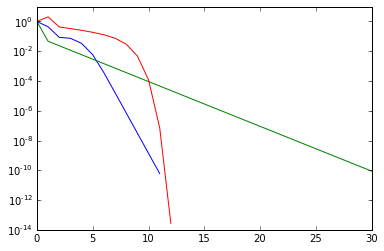

In [65]:
semilogy(error_fixedpoint,label="fixed")
semilogy(error_bisect,label="bisec")
semilogy(error_newton,label="newton")
semilogy(error_chord,label="chord")
semilogy(error_secant,label="secant")

In [ ]:
# plot the error convergence for the methods

In [ ]:
# Let's compare the scipy implmentation of Newton's method with our..